In [1]:
# fix the cross-validation process using Pipeline
from sklearn.pipeline import make_pipeline
from __future__ import division # ensure that all division is float division
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn import metrics
#import all the necessary modules
import os, sys, re
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline
sns.set()
sns.set_style("whitegrid")

# Train-test Split

In [2]:
os.chdir(r"C:\Users\Dominique Njinkeu\Documents\GitHub\Projects\notebook")
df=pd.read_csv("tweets_sample.csv")
df.Support.value_counts()
# map the label values for scikit-learn
df["Label"]=df.Support.map({"Neutral":0,"Panthers":1,"Broncos":2})
#determine feature and label variables
X=df.text
y=df.Label
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# initial text vectorization

In [3]:
vect=CountVectorizer()
tfidf=TfidfVectorizer()

In [4]:
os.chdir(r"C:\Users\Dominique Njinkeu\Documents\GitHub\Projects\codes")

In [5]:
from test_classifiers import classifier

# instantiate initial classifiers

In [6]:
#multinomialNB classifier
from sklearn.naive_bayes import MultinomialNB
clfNB=MultinomialNB()
#knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
#linear SVM
from sklearn import svm
linear_svc=LinearSVC()
#Logistic Regression
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)

In [7]:
model_scores=[]

# Multinomial Naive Bayes

In [8]:
init_MNB=classifier(vect,clfNB)
model_scores.append({"name":"MultinomialNB","score":init_MNB,
                     "vectorizer":"CountVectorizer"})

Features:  5858
classification_report
             precision    recall  f1-score   support

          0       0.79      0.95      0.86       411
          1       0.84      0.79      0.81       207
          2       0.88      0.40      0.55       132

avg / total       0.82      0.81      0.79       750

accuracy_score 0.806666666667


# Knn

In [9]:
init_knn=classifier(vect,knn)
model_scores.append({"name":"knn","score":init_knn,"vectorizer":"CountVectorizer"})

Features:  5858
classification_report
             precision    recall  f1-score   support

          0       0.88      0.86      0.87       411
          1       0.73      0.89      0.80       207
          2       0.81      0.59      0.68       132

avg / total       0.83      0.82      0.82       750

accuracy_score 0.82


# Linear SVM

In [10]:
init_svm=classifier(vect,linear_svc)
model_scores.append({"name":"linear svm","score":init_svm,"vectorizer":"CountVectorizer"})

Features:  5858
classification_report
             precision    recall  f1-score   support

          0       0.90      0.92      0.91       411
          1       0.83      0.88      0.86       207
          2       0.86      0.73      0.79       132

avg / total       0.88      0.88      0.88       750

accuracy_score 0.877333333333


# Logistic Regression

In [11]:
init_logreg=classifier(vect,logreg)
model_scores.append({"name":"log reg","score":init_logreg,
                    "vectorizer":"CountVectorizer"})

Features:  5858
classification_report
             precision    recall  f1-score   support

          0       0.90      0.91      0.90       411
          1       0.82      0.86      0.84       207
          2       0.81      0.72      0.76       132

avg / total       0.86      0.86      0.86       750

accuracy_score 0.862666666667


# Find best paramters

# best multinomial

In [12]:
mbn_params = {'alpha': [a*0.1 for a in range(0,11)]}
mbn_clf = GridSearchCV(MultinomialNB(), mbn_params, cv=10)
X_train_dtm=vect.fit_transform(X_train)
mbn_clf.fit(X_train_dtm, y_train)
print 'best parameters'
print mbn_clf.best_params_
best_mbn = MultinomialNB(alpha=mbn_clf.best_params_['alpha'])

best parameters
{'alpha': 1.0}


In [13]:
"""Best score for Multinomial: 0.841
('vect', CountVectorizer(stop_words='english',ngram_range=(1,2),max_df=.75,max_features=1836))
"""

"""Best score: 0.816
Best parameters set for tfidf:
TfidfVectorizer(stop_words='english',ngram_range=(1,2),norm="l2",use_idf=False,max_df=.5,max_features=373)
"""

'Best score: 0.816\nBest parameters set for tfidf:\nTfidfVectorizer(stop_words=\'english\',ngram_range=(1,2),norm="l2",use_idf=False,max_df=.5,max_features=373)\n'

In [14]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),max_df=.75,max_features=1106)
clfNB=MultinomialNB(alpha=1.0)
init_MNB=classifier(vect,clfNB)
model_scores.append({"name":"best_MultinomialNB","score":init_MNB,
                     "vectorizer":"CountVectorizer"})

Features:  1106
classification_report
             precision    recall  f1-score   support

          0       0.87      0.89      0.88       411
          1       0.82      0.84      0.83       207
          2       0.72      0.66      0.69       132

avg / total       0.83      0.83      0.83       750

accuracy_score 0.833333333333


# best knn

In [15]:
"""Best score: 0.848
Best parameters set for vect:
        vect__max_features: 21
        CountVectorizer(stop_words='english',ngram_range=(1,1),max_df=.75)
 Best score: 0.857
Best parameters set for tfidf:
        tfidf__max_features: 30
    TfidfVectorizer(stop_words='english',ngram_range=(1,2),use_idf=False,max_df=.5,norm="l2")
Best score: 0.854
Best parameters set for tfidf:
        clf__n_neighbors: 12

"""


'Best score: 0.848\nBest parameters set for vect:\n        vect__max_features: 21\n        CountVectorizer(stop_words=\'english\',ngram_range=(1,1),max_df=.75)\n Best score: 0.857\nBest parameters set for tfidf:\n        tfidf__max_features: 30\n    TfidfVectorizer(stop_words=\'english\',ngram_range=(1,2),use_idf=False,max_df=.5,norm="l2")\nBest score: 0.854\nBest parameters set for tfidf:\n        clf__n_neighbors: 12\n\n'

In [16]:
tfidf=TfidfVectorizer(stop_words='english',ngram_range=(1,2),use_idf=False,max_df=.5,norm="l2",
                     max_features=25)
knn=KNeighborsClassifier(weights="distance",leaf_size=10,p=1,n_neighbors=12)
init_knn=classifier(tfidf,knn)
model_scores.append({"name":"best_knn","score":init_knn,"vectorizer":"TfidfVectorizer"})

Features:  25
classification_report
             precision    recall  f1-score   support

          0       0.90      0.92      0.91       411
          1       0.82      0.84      0.83       207
          2       0.85      0.75      0.80       132

avg / total       0.87      0.87      0.87       750

accuracy_score 0.868


In [17]:
"""# linear svm
lsvm_params = {'C':[1,10,100,1000], 'loss':['l1', 'l2']}
lsvm_clf = GridSearchCV(LinearSVC(), lsvm_params, cv=5)
lsvm_clf.fit(X_train_dtm, y_train)
print 'best parameters'
print lsvm_clf.best_params_
best_lsvm = LinearSVC(C=lsvm_clf.best_params_['C'], loss=lsvm_clf.best_params_['loss'])"""

"# linear svm\nlsvm_params = {'C':[1,10,100,1000], 'loss':['l1', 'l2']}\nlsvm_clf = GridSearchCV(LinearSVC(), lsvm_params, cv=5)\nlsvm_clf.fit(X_train_dtm, y_train)\nprint 'best parameters'\nprint lsvm_clf.best_params_\nbest_lsvm = LinearSVC(C=lsvm_clf.best_params_['C'], loss=lsvm_clf.best_params_['loss'])"

In [18]:
"""
best parameters
{'loss': 'l2', 'C': 1}

Best score: 0.887
Best parameters set for tfidf:
        tfidf__max_features: 1814
        TfidfVectorizer(stop_words='english',max_df=.5,ngram_range=(1,2),norm="l2",use_idf=False)


"""

'\nbest parameters\n{\'loss\': \'l2\', \'C\': 1}\n\nBest score: 0.887\nBest parameters set for tfidf:\n        tfidf__max_features: 1814\n        TfidfVectorizer(stop_words=\'english\',max_df=.5,ngram_range=(1,2),norm="l2",use_idf=False)\n\n\n'

In [19]:
linear_svc=LinearSVC(loss="l2",C=1)
tfidf=TfidfVectorizer(stop_words='english',ngram_range=(1,3),max_df=.5,use_idf=False,max_features=8015)
init_svm=classifier(tfidf,linear_svc)
model_scores.append({"name":"best_linear svm","score":init_svm,"vectorizer":"TfidfVectorizer"})

Features:  8015
classification_report
             precision    recall  f1-score   support

          0       0.94      0.91      0.92       411
          1       0.84      0.91      0.88       207
          2       0.83      0.79      0.81       132

avg / total       0.89      0.89      0.89       750

accuracy_score 0.890666666667


C:\Users\Dominique Njinkeu\AppData\Local\Enthought\Canopy\User\lib\site-packages\sklearn\svm\classes.py:197: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)


In [20]:
logreg=linear_model.LogisticRegression(C=1000,penalty="l2")
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),max_df=.5)
init_logreg=classifier(vect,logreg)
model_scores.append({"name":"best_log reg","score":init_logreg,
                    "vectorizer":"CountVectorizer"})

Features:  17835
classification_report
             precision    recall  f1-score   support

          0       0.92      0.92      0.92       411
          1       0.85      0.89      0.87       207
          2       0.84      0.78      0.81       132

avg / total       0.89      0.89      0.89       750

accuracy_score 0.889333333333


In [81]:
scores_tbl=[]
scores_tbl.append(["name","Vectorizer",
                   "prec_0","rec_0","f1_0",
                  "prec_1","rec_1","f1_1",
                  "prec_2","rec_2","f1_2","accuracy"])
i=0
for score in model_scores:
    
    scr=[]
    
    scr.append(score["name"])
    scr.append(score["vectorizer"])
    for sc in score["score"]:
        scr.append(sc)
    scores_tbl.append(scr)


In [24]:
import pandas as pd
a=pd.DataFrame(scores_tbl,index=None)

In [25]:
a.to_excel("presentation_table.xls")

In [27]:
df.head()

,rndm,id,created_at,favorite_count,favorited,retweeted,text,timestamp_ms,Support,Label
0,67,6.960000e+17,Sun Feb 07 19:14:38 +0000 2016,0,False,False,RT @WorldStarFunny: Panthers hitting the dab f...,1.450000e+12,Panthers,1
1,923,6.960000e+17,Sun Feb 07 19:14:58 +0000 2016,0,False,False,"RT @Pokemon: It's Game Day, Trainers! Who's re...",1.450000e+12,Neutral,0
2,1039,6.960000e+17,Sun Feb 07 19:15:00 +0000 2016,0,False,False,Except Star he a trill nigga! https://t.co/Ie...,1.450000e+12,Neutral,0
3,1617,6.960000e+17,Sun Feb 07 19:15:13 +0000 2016,0,False,False,#SuperBowl night lets get it on. If Broncos de...,1.450000e+12,Broncos,2
4,1784,6.960000e+17,Sun Feb 07 19:15:17 +0000 2016,0,False,False,RT @esurance: RT during the big game for your ...,1.450000e+12,Neutral,0


In [30]:
df.columns

Index([u'rndm', u'id', u'created_at', u'favorite_count', u'favorited',
       u'retweeted', u'text', u'timestamp_ms', u'Support', u'Label'],
      dtype='object')

In [52]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import PIL

In [61]:
words = ' '.join(df['text'])
font_path=r"C:\Windows\Fonts\Elephant.ttf"

In [62]:
words = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [72]:
wordcloud = WordCloud(
font_path="comicbd.ttf",
stopwords=STOPWORDS,
background_color='black',
max_words=500,
width=1800,
height=1400
).generate(words)

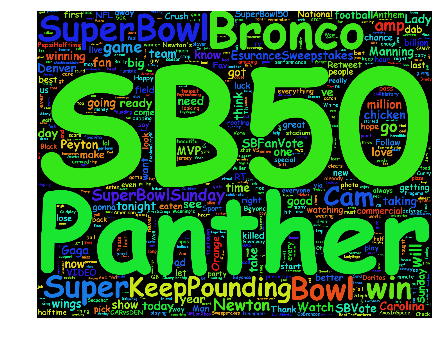

In [73]:
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./cloud2.png', dpi=300)
plt.show()

In [80]:
df.groupby(["Label"])["Label"].count()

Support
Broncos      529
Neutral     1644
Panthers     827
Name: Label, dtype: int64

In [83]:
pipeline1 = Pipeline([
    
    ("tfidf",TfidfVectorizer(stop_words='english',ngram_range=(1,3),max_df=.5,
                            use_idf=False,max_features=8015)),

    
    ('clf', LinearSVC(loss="l2",C=1)),
    ]
)


In [84]:
pipeline2 = Pipeline([
    ('vect', CountVectorizer(stop_words='english',ngram_range=(1,2),max_df=.5)),
    
    
    ('clf', linear_model.LogisticRegression(C=1000,penalty="l2")),
    ]
)


In [87]:
cross_val_score(pipeline1, X, y, cv=10, scoring='accuracy').mean()

C:\Users\Dominique Njinkeu\AppData\Local\Enthought\Canopy\User\lib\site-packages\sklearn\svm\classes.py:197: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)
C:\Users\Dominique Njinkeu\AppData\Local\Enthought\Canopy\User\lib\site-packages\sklearn\svm\classes.py:197: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)
C:\Users\Dominique Njinkeu\AppData\Local\Enthought\Canopy\User\lib\site-packages\sklearn\svm\classes.py:197: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)
C:\Users\Dominique Njinkeu\AppData\Local\Enthought\Canopy\User\lib\site-packages\sklearn\svm\classes.py:197: DeprecationWarning: l

0.87797750439832123

In [88]:
cross_val_score(pipeline2, X, y, cv=10, scoring='accuracy').mean()

0.87730969305077777